In [74]:
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [75]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3, random_state=2)

# KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

**Using GridSearchCV to find best value of n_neighbors in knn**

In [78]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,4,5,6,7,8,9,10]
}, cv=5, return_train_score=True)


clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [79]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001716,0.000302,0.008969,0.000430,3,{'n_neighbors': 3},0.992063,0.984127,0.988048,0.976096,...,0.985676,0.005408,2,0.995025,0.993035,0.993042,0.993042,0.991054,0.993039,0.001256
1,0.001545,0.000242,0.008819,0.000508,4,{'n_neighbors': 4},0.992063,0.980159,0.984064,0.972112,...,0.983289,0.006855,4,0.992040,0.992040,0.986083,0.993042,0.987078,0.990056,0.002879
2,0.001643,0.000192,0.009263,0.000487,5,{'n_neighbors': 5},0.988095,0.984127,0.984064,0.988048,...,0.986476,0.001944,1,0.990050,0.992040,0.990060,0.991054,0.988072,0.990255,0.001317
3,0.001536,0.000113,0.008899,0.000620,6,{'n_neighbors': 6},0.988095,0.980159,0.980080,0.976096,...,0.982495,0.004784,5,0.987065,0.991045,0.989066,0.989066,0.986083,0.988465,0.001733
4,0.001505,0.000048,0.009153,0.000521,7,{'n_neighbors': 7},0.984127,0.980159,0.988048,0.980080,...,0.984092,0.003546,3,0.991045,0.992040,0.990060,0.991054,0.987078,0.990255,0.001708
5,0.001431,0.000052,0.008983,0.000536,8,{'n_neighbors': 8},0.984127,0.968254,0.980080,0.976096,...,0.978524,0.005931,7,0.987065,0.987065,0.986083,0.990060,0.987078,0.987470,0.001350
6,0.001388,0.000033,0.008602,0.000405,9,{'n_neighbors': 9},0.984127,0.976190,0.980080,0.980080,...,0.981705,0.004045,6,0.985075,0.988060,0.987078,0.990060,0.987078,0.987470,0.001619
7,0.001372,0.000045,0.008422,0.000213,10,{'n_neighbors': 10},0.984127,0.976190,0.980080,0.968127,...,0.978518,0.005967,8,0.981095,0.986070,0.983101,0.987078,0.984095,0.984288,0.002126


**From the above table we can analyze that the best n_neighbours = 5 is best(as per GridSearchCV).**

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
knn_model.score(X_test, y_test)

0.9740740740740741

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 41]])

Text(95.72222222222221, 0.5, 'Truth')

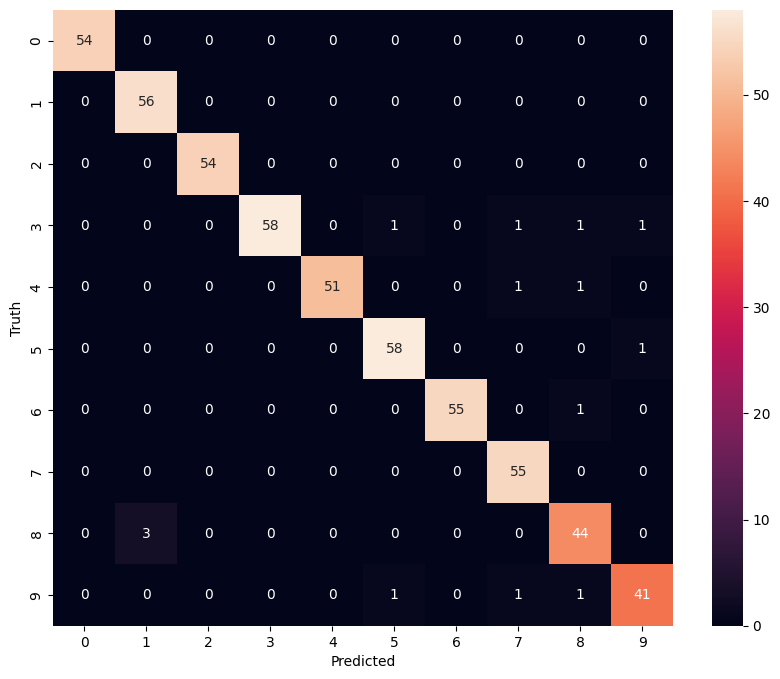

In [83]:
# Now creating the heatmap of the above matrix
import seaborn as sn
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        54
           3       1.00      0.94      0.97        62
           4       1.00      0.96      0.98        53
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        56
           7       0.95      1.00      0.97        55
           8       0.92      0.94      0.93        47
           9       0.95      0.93      0.94        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

